## <font color='blue'>**Analysis of the severity of car accidents in U.S(a machine learning project example)**</font>
In this project, I analysed a dataset of all car crashes happened in the U.S. between 2016 to 2020. This dataset contains 1.2 million accidents where for each information about the time of the accident, exact location of the accident, the weather information at the time of the accident and severity of the accident exists in the dataset.
  To do the analysis, in the first step, i did some data cleaning. Feature extraction was necessary and was the second step of this analysis. Then the effects of each feature on the severity of the accidents was analysed. And finally using deep learning models, a model for predicting the severity of car accidents just using the provided features was developed and tested.
  
### <font color='green'>**Dependencies:**</font>
1. Numpy 
2. Pandas 
3. Sikit-learn
4. Keras(Tensorflow - backend)
5. Tensorflow 2.0
6. Matplotlib
7. Seaborn

### <font color='green'>**Datasets:**</font>
* The main dataset was downloaded from kaggle at [here](https://www.kaggle.com/sobhanmoosavi/us-accidents) : the size of this CSV format dataset is  570 M and it contains  dataframe with 1.2 million rows and 47 collumns.

* A word representation dataset, GloVe from Stanford university at [here](https://nlp.stanford.edu/projects/glove/).

<code>  



</code>


#### <font>**Loading and Exploring the Dataset**</font>



In [1]:
import numpy as np
import pandas as pd
import csv
np.random.seed(1)

In [2]:
df = pd.read_csv(r'C:\Users\m\Desktop\job\projects\kaggle\archive\US_Accidents_Dec20_updated.csv')
df.head()
# As seen, it contains several non numerical columns.

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-2716600,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2716601,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-2716602,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-2716603,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
4,A-2716604,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day


In [3]:
np.shape(df)

(1516064, 47)

In [4]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,1.516064e+06,4.699690e+05,1.473031e+06,1.066748e+06,1.470555e+06,1.479790e+06,1.471853e+06,1.387202e+06,1.005515e+06
mean,2.238630e+00,3.690056e+01,-9.859919e+01,3.690061e+01,-9.859901e+01,5.872617e-01,8.907533e+03,5.958460e+01,5.510976e+01,6.465960e+01,2.955495e+01,9.131755e+00,7.630812e+00,8.477855e-03
std,6.081481e-01,5.165653e+00,1.849602e+01,5.165629e+00,1.849590e+01,1.632659e+00,2.242190e+04,1.827316e+01,2.112735e+01,2.325986e+01,1.016756e+00,2.889112e+00,5.637364e+00,1.293168e-01
min,1.000000e+00,2.457022e+01,-1.244976e+02,2.457011e+01,-1.244978e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.385422e+01,-1.182076e+02,3.385420e+01,-1.182077e+02,0.000000e+00,1.212000e+03,4.700000e+01,4.080000e+01,4.800000e+01,2.944000e+01,1.000000e+01,4.600000e+00,0.000000e+00
50%,2.000000e+00,3.735113e+01,-9.438100e+01,3.735134e+01,-9.437987e+01,1.780000e-01,4.000000e+03,6.100000e+01,5.700000e+01,6.800000e+01,2.988000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.072593e+01,-8.087469e+01,4.072593e+01,-8.087449e+01,5.940000e-01,1.010000e+04,7.300000e+01,7.100000e+01,8.400000e+01,3.004000e+01,1.000000e+01,1.040000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.706000e+02,1.130000e+02,1.000000e+02,5.804000e+01,1.400000e+02,9.840000e+02,2.400000e+01


In [5]:
df.dtypes

ID                        object
Severity                   int64
Start_Time                object
End_Time                  object
Start_Lat                float64
Start_Lng                float64
End_Lat                  float64
End_Lng                  float64
Distance(mi)             float64
Description               object
Number                   float64
Street                    object
Side                      object
City                      object
County                    object
State                     object
Zipcode                   object
Country                   object
Timezone                  object
Airport_Code              object
Weather_Timestamp         object
Temperature(F)           float64
Wind_Chill(F)            float64
Humidity(%)              float64
Pressure(in)             float64
Visibility(mi)           float64
Wind_Direction            object
Wind_Speed(mph)          float64
Precipitation(in)        float64
Weather_Condition         object
Amenity   

In [6]:
df.memory_usage()

Index                         128
ID                       12128512
Severity                 12128512
Start_Time               12128512
End_Time                 12128512
Start_Lat                12128512
Start_Lng                12128512
End_Lat                  12128512
End_Lng                  12128512
Distance(mi)             12128512
Description              12128512
Number                   12128512
Street                   12128512
Side                     12128512
City                     12128512
County                   12128512
State                    12128512
Zipcode                  12128512
Country                  12128512
Timezone                 12128512
Airport_Code             12128512
Weather_Timestamp        12128512
Temperature(F)           12128512
Wind_Chill(F)            12128512
Humidity(%)              12128512
Pressure(in)             12128512
Visibility(mi)           12128512
Wind_Direction           12128512
Wind_Speed(mph)          12128512
Precipitation(

<code>  



</code>


#### <font>**Cleaning the data, Filling the missing values:**</font>

In [7]:
cat_col = list(df.select_dtypes(include = ["object"]).columns) # here I list the non numerical columns.
non_cat_col = df.select_dtypes(exclude = ["object"]).columns # numerical columns are listed too.
df.isna().sum()# here we see the number of unknown values for each column. 
#The column Number has the maximum number of unknown values.

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1046095
Street                         0
Side                           0
City                          83
County                         0
State                          0
Zipcode                      935
Country                        0
Timezone                    2302
Airport_Code                4248
Weather_Timestamp          30264
Temperature(F)             43033
Wind_Chill(F)             449316
Humidity(%)                45509
Pressure(in)               36274
Visibility(mi)             44211
Wind_Direction             41858
Wind_Speed(mph)           128862
Precipitation(in)         510549
Weather_Condition          44007
Amenity   

In [8]:
for c in cat_col:# here we just have a closer look at the values of different non numerical columns and also 
    #see how much unique values each one has. 
    print(df[c].value_counts())
    print(df[c].unique())

A-3399575    1
A-2885543    1
A-4035660    1
A-3155656    1
A-3266936    1
            ..
A-4035668    1
A-3650053    1
A-2924149    1
A-3534955    1
A-4165966    1
Name: ID, Length: 1516064, dtype: int64
['A-2716600' 'A-2716601' 'A-2716602' ... 'A-4239404' 'A-4239405'
 'A-4239406']
2020-12-16 13:53:25    109
2020-09-30 12:41:30     80
2017-05-15 09:22:55     74
2020-12-16 13:54:00     61
2020-10-12 11:13:30     60
                      ... 
2018-04-18 18:31:43      1
2017-02-09 09:15:27      1
2020-02-06 19:18:07      1
2019-12-10 04:42:00      1
2020-05-22 08:12:31      1
Name: Start_Time, Length: 1037092, dtype: int64
['2016-02-08 00:37:08' '2016-02-08 05:56:20' '2016-02-08 06:15:39' ...
 '2019-08-23 19:11:30' '2019-08-23 19:00:21' '2019-08-23 18:52:06']
2017-05-15 15:22:55    73
2019-10-26 09:14:51    49
2020-02-14 00:00:00    46
2020-02-12 00:00:00    42
2020-01-25 00:00:00    41
                       ..
2017-03-12 22:03:28     1
2020-04-23 00:06:28     1
2020-09-12 19:58:00     

In [9]:
df['Weather_Timestamp'].fillna(df['Start_Time'], inplace = True) # the values of the weather timestamp are filled with
# the accident occurence timestamp.
for c in cat_col:# the rest of the non numerical columns unknown values cannot be approximated so we replaced 
    # them with -1. Please note that this value is unique among nun numerical columns.
    df[c].fillna(-1, inplace = True)

In [10]:
# There are three timestamp columns in the dataset related to the accidents:
# 'Weather_timestamp', 'Start_time' and 'End_time'. To extract the relevent features , the weather_timestap column 
# seems to be more relevent if we convert it linearly to time. For the start_ time column, instead I extracted
# date(in days), time of the day, and day of the week features. And, for the last one, only the duration of it 
# to the start of the accidient, named duration was extracted.





import math
from datetime import datetime
def string_to_timestamp(st): # this function just converts a timestamp to a list of it's components
    # such as year, month, year, etc.,
    try:
        return datetime.strptime(st, '%Y-%m-%d %H:%M:%S')
    except ValueError:# some of the timestamp had a different format so i used this to filter them out
        return datetime.strptime(st[:-10], '%Y-%m-%d %H:%M:%S')
    
    
    
def t_s_to_feature(d_t): # this function receives componets of a timestamp and converts it to day, 
    # time of the day and and the day of the week.
    day = (d_t.year - 2016) * 365 + d_t.month * 30 + d_t.day# all accidents are from 2016 and after.
    time = (d_t.hour + d_t.minute / 60) / 24 * 2 * math.pi # converts 0-24 scale to 0-2pi
    time_1 = math.cos(time) # I used cartasian components of the time of the accident,
    # the cartasian components, may be more relevent to the occurence, and severity of the accident.
    time_2 = math.sin(time)
    return [day, time_1, time_2, str(d_t.weekday())]




def timestamp_in_scale(t_s):# converts the timestamp to point in time (in hours). I use this 
    # for weather timestamp conversion. This may be more relevent to bad weather conditions at some time.
    day = (t_s.year - 2016) * 365 + t_s.month * 30 + t_s.day
    time = (t_s.hour + t_s.minute / 60)
    return day * 24 + time

def duration_f(t_s_1, t_s_2):
    return (t_s_2 - t_s_1).total_seconds() / 3600


ac_st = df['Start_Time'].map(string_to_timestamp) # first the three timestamps are converted to their components.
ac_end = df['End_Time'].map(string_to_timestamp)
ac_t_s = df['Weather_Timestamp'].map(string_to_timestamp)


duration = list(map(lambda a:duration_f(a[0], a[1]), zip(ac_st, ac_end))) # the duration of the accident, 
# from accident time until, I guess, end of police presence at the scene.
ac_weath_timestamp_in_scal = ac_t_s.map(timestamp_in_scale)
ac_time_info = ac_st.map(t_s_to_feature)

for ind, c in enumerate(['day', 'time_dim_1', 'time_dim_2', 'day_of_week']): # the obtained features are added to the 
    # Dataframe. The names are, Day(from weather timestamp), time_dim_1 and time_dim_2 from the start time and duration
    # from the End_Time.
    df[c] = pd.Series(list(map(lambda s: s[ind], ac_time_info)))
df['duration'] = pd.Series(duration)
df['ac_weath_timestamp_in_scal'] = pd.Series(ac_weath_timestamp_in_scal)

del ac_st, ac_end, ac_t_s, duration, ac_weath_timestamp_in_scal, ac_time_info # these variables
# are removed to save some memory.

df = df.drop(['ID', 'Start_Time', 'End_Time', 'Weather_Timestamp', 'Country'], axis=1)
# the columns are removed . ID columns are unique. The Country is the U.S. for all accidents in the Dataset
#and time columns have been already conveted.

df.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,...,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day,time_dim_1,time_dim_2,day_of_week,duration,ac_weath_timestamp_in_scal
0,3,40.10891,-83.09286,40.11206,-83.03187,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,NaN,Outerbelt E,R,...,Night,Night,Night,Night,68,0.986996,0.160743,0,6.0,1632.883333
1,2,39.86542,-84.06280,39.86501,-84.04873,0.747,At OH-4/OH-235/Exit 41 - Accident.,NaN,I-70 E,R,...,Night,Night,Night,Night,68,0.017452,0.999848,0,6.0,1637.966667
2,2,39.10266,-84.52468,39.10209,-84.52396,0.055,At I-71/US-50/Exit 1 - Accident.,NaN,I-75 S,R,...,Night,Night,Night,Day,68,-0.065403,0.997859,0,6.0,1637.883333
3,2,39.10148,-84.52341,39.09841,-84.52241,0.219,At I-71/US-50/Exit 1 - Accident.,NaN,US-50 E,R,...,Night,Night,Night,Day,68,-0.065403,0.997859,0,6.0,1637.883333
4,2,41.06213,-81.53784,41.06217,-81.53547,0.123,At Dart Ave/Exit 21 - Accident.,NaN,I-77 N,R,...,Night,Night,Day,Day,68,-0.220697,0.975342,0,6.0,1638.900000


In [11]:
for c in non_cat_col: 
    print(df[c].value_counts())
    print(np.sort(df[c].unique()))
# here we explore the numerical columns and the their range of values. As seen the severity rate of the accidents has 
# four values from 1 to 4. The dataset
# is very unbalaced with the majority of the samples belonging to rate 2:
# Severity(type)     percentage(approx.) from the dataset
# 2                    79
# 3                    10
# 4                    10
# 1                     1
# to predict the severity of the accidents I considered the problem as a classification task. Also, 
# instead of class weights, I removed class 1 and undersampleed class 2 to have the same size of the
# class 3 and 4.

2    1212382
3     161052
4     114452
1      28178
Name: Severity, dtype: int64
[1 2 3 4]
40.853060    255
25.823117    246
25.910063    220
45.580470    183
41.797330    150
            ... 
39.282879      1
39.613665      1
39.856430      1
45.494490      1
42.062008      1
Name: Start_Lat, Length: 590611, dtype: int64
[24.570222 24.570584 24.571202 ... 49.00026  49.00056  49.00058 ]
-80.206385     246
-73.960110     243
-80.210076     220
-122.543580    181
-122.665330    165
              ... 
-103.621430      1
-78.682585       1
-86.756943       1
-79.549752       1
-76.243040       1
Name: Start_Lng, Length: 603369, dtype: int64
[-124.497567 -124.497523 -124.49747  ...  -67.48413   -67.403551
  -67.113167]
40.849920    257
25.910937    246
25.824413    220
25.684322    217
25.686252    207
            ... 
33.514783      1
41.025250      1
38.265770      1
30.232855      1
29.503410      1
Name: End_Lat, Length: 587824, dtype: int64
[24.57011 24.57018 24.57036 ... 49.00076 49.0

In [12]:
df = df.drop(['Turning_Loop'], axis = 1)
# the Turning_Loop column has zero variance, as seen, so it's removed.

cat_col = df.select_dtypes(include = ["object"]).columns
non_cat_col = df.select_dtypes(exclude = ['object']).columns

df['Wind_Chill(F)'].fillna(-100, inplace = True) # I used -100 to fill unknown values of Wind_Chill(F) columns and
# 'Temperature' columns to make sure they are out of the known value range of these two columns.
df['Temperature(F)'].fillna(-100, inplace = True)
for c in non_cat_col:# for the rest of the numerical columns -1 is not in the range of their known values.
    df[c].fillna(-1, inplace = True)
df.isna().sum()

Severity                      0
Start_Lat                     0
Start_Lng                     0
End_Lat                       0
End_Lng                       0
Distance(mi)                  0
Description                   0
Number                        0
Street                        0
Side                          0
City                          0
County                        0
State                         0
Zipcode                       0
Timezone                      0
Airport_Code                  0
Temperature(F)                0
Wind_Chill(F)                 0
Humidity(%)                   0
Pressure(in)                  0
Visibility(mi)                0
Wind_Direction                0
Wind_Speed(mph)               0
Precipitation(in)             0
Weather_Condition             0
Amenity                       0
Bump                          0
Crossing                      0
Give_Way                      0
Junction                      0
No_Exit                       0
Railway 

In [13]:
# the categorical columns have to be converted to labels/codes. i didnt get dummy columns for them because the distinc
# values of this categorical column is very high and it will result in a very high number of columns.

cat_col = list(cat_col)
cat_col.remove("Description") # Description column is treated ddifferently. Just using dummy codes doesn't seem to be helpful
# because the number of distinct discription strings is 1.1 milllion so no information can be extracted from th labels
# alone. In the following, I used natural language processing methods to make a good feature out of it.
df[cat_col] = df[cat_col].astype('category') # the categorial columns datatype is object in this dataset. the
# columns need to be defined category to be converted to codes.
my_codes = {}
my_dict = {}
for c in cat_col:
    my_map = dict(enumerate(df[c].cat.categories))
    my_codes[c] = my_map
    my_dict[c] = dict(zip(my_map.values(), my_map.keys()))
    df[c] = df[c].cat.codes

In [14]:
# here I removed the 1 percent samples belonging to class 1 and downsample class 2 to have a dataset with only 3 
# severity rate classes with equlal size of the samples for each class.

def down_sample(df, column_name):
    nmin = df[column_name].value_counts().min()
    return df.groupby(column_name).apply(lambda x: x.sample(nmin, random_state = 0)).reset_index(drop = True)

df.drop(df.index[df['Severity'] == 1], axis = 0, inplace = True) # this line removes the sample belonging to 
# severity rate 1.


df = down_sample(df, 'Severity') # this oversamples class 2 and majority of class 3. At the end, each severity classe
# will have 114452 samples.

temp_list = df['Severity'].value_counts()
print(temp_list)

df['Severity'] = df['Severity'].map(lambda s:s-2) # to make a machine learning classification model the 
# lables should start at zero. so we map aall labels from 2,3,and 4 to 0,1, and 2.




4    114452
3    114452
2    114452
Name: Severity, dtype: int64


<code>  



</code>


#### <font>**Converting Description column to useful features using NLP**</font>

In [15]:
# the Description column may have good information about the severity of the Accidents. However, string is not a good 
# format. I used length of the string as a new feature. Also, I used a NLP semantic analysis model to make a second
# feature from the Description column of the dataset. The length column is directly achived. However. to 
# conduct semantic analysis, I  seperated 30000 samples from the datset
#  which is around 8 percent of the total balanced dataset. I used this for model training and 
#the  validation. Using the obtained semantic analysis model, I converted the Description column of the remaining %92
#  of the dataset.
description_length = df["Description"].map(len)# the length of the description string obtained.
df["Description_length(char)"] = description_length# the length is added as a new feature.

semantic_data = df.sample(30000, random_state = 0) # the 30000 samples from the dataset is are
#sampled for semantic data analysis

df = df.drop(index = semantic_data.index) # the previous samples are removed from the dataset

semantic_data.reset_index(drop = True)
semantic_data.head()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Number,Street,Side,...,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,day,time_dim_1,time_dim_2,day_of_week,duration,ac_weath_timestamp_in_scal,Description_length(char)
78411,0,40.643590,-74.659590,40.643590,-74.659590,0.000,At I-287/Exit 29 - Accident.,-1.0,73326,1,...,1,1,1,1598,-0.386711,0.922201,5,0.500000,38359.433333,28
85624,0,46.175302,-123.503531,46.170420,-123.488065,0.813,At Westport Ferry Rd/Westport School Loop Rd -...,45760.0,21825,0,...,2,2,1,1097,-0.065403,-0.997859,4,4.000000,26345.933333,56
241239,2,38.056450,-84.489140,38.056450,-84.489140,0.000,At US-25-byp/US-421-byp/KY-4 - Accident.,598.0,31281,1,...,1,1,1,1651,-0.426569,-0.904455,3,2.000000,39639.900000,40
128883,1,38.401170,-82.482660,38.399930,-82.475800,0.381,At US-52/Exit 6 - Accident. Lane blocked.,-1.0,73254,1,...,1,1,1,1540,0.130526,-0.991445,3,0.476944,36978.850000,41
19620,0,33.801967,-118.114654,33.801967,-118.114654,0.000,At Woodruff Ave/Exit 25/Exit 26A - Accident.,-1.0,92857,1,...,1,1,1,1398,-0.938191,0.346117,3,1.833056,33562.883333,44


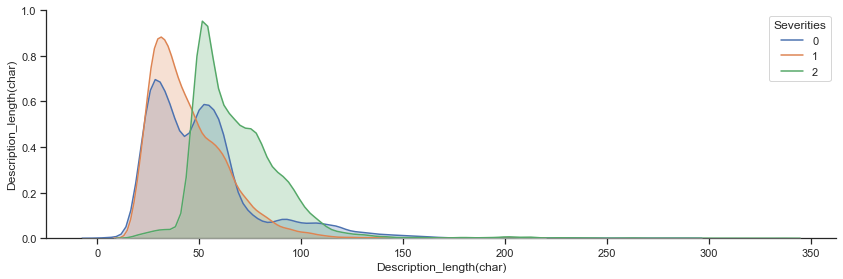

In [16]:
#  here first I plot the length of the description for different severity types. As seen, just from the length
# the Severity type 2 is somewhat differentiable from the other two categories.
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style = "ticks", color_codes = True)
g = sns.pairplot(semantic_data[['Description_length(char)', 'Severity']], hue = 'Severity')
g.fig.set_size_inches(20, 4)
g._legend.remove()
plt.legend(title = 'Severities')
plt.show()


In [17]:
# for sematic analysis task of the Semantic Dataset, I first splited the description string of each sample to words. 
# then for the first 30 meaningful words in each description, a matrix containing the word embedding representation is 
# replaced using GloVe Dataset. Then a semantic analysis model is used for training and validation.


word_rep_dict = {}# here the GloVe-50 is opened.
with open(r'C:\Users\m\Desktop\job\projects\kaggle\archive\glove.6B\glove.6B.50d.txt','r') as f:
    for line in f:
        try: 
            line_s = line.split()
            word = line_s[0]
            embedding = np.array(line_s[1:], dtype = np.float64)
            word_rep_dict[word] = embedding
            len(split_line)==51 # to skip  a few words that have different representation sizes than 50.
        except:
            pass
word_rep_keys = word_rep_dict.keys()






def split(string): # converts each Description string to its words.
    import re
    return re.split(";|:|,| |/",string)

def Description_rep(Description, word_rep_dict, word_rep_keys): # for each word, the first 30 words that exist in 
    # GloVe dataset are used to represnt the Descriptipn. Note that the GloVe dataset has around 
    #350 k words and symbols. Also the majority of the descriptions have a length less than 30 words.
    res = np.zeros((30, 50))
    Description = split(Description)
    
    for i in range(min(30, len(Description))):
        word = Description[i].lower()
        if word in word_rep_keys:
           res[i, :] = word_rep_dict[word]
    return res









# this convets all description column of the semantic datset to its representation matrix.
semantic_data['Description'] = semantic_data['Description'].map(
    lambda s :Description_rep(s, word_rep_dict, word_rep_keys)) 





sample_size = len(semantic_data) # to make the shapes compatible.
arr = np.zeros((sample_size, 30, 50)) #all the input data will be put in this array.
for i in range(sample_size):
    arr[i, :, :] = semantic_data.loc[:, 'Description'].iloc[i]

    
    

mn = np.min(np.min(np.min(arr))) # the input is scaled to [0,1].
mx = np.max(np.max(np.max(arr)))
denm = mx - mn
arr -= mn
arr /= denm

In [18]:
# for semantic analysis model building, I used Keras library with tensorfloew backend.
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.utils import shuffle
import tensorflow as tf
tf.random.set_seed(1)

train_ds = tf.data.Dataset.from_tensor_slices((arr, semantic_data['Severity'])) # the dataset is built.
del arr, semantic_data # these variables are deleted to save memory.
train_ds = train_ds.shuffle(buffer_size = len(train_ds), seed = 0) # shuffling the datset.
val_ds=train_ds.take(1000) # out of 30000 samples, 1000 samples are used for validation.
train_ds=train_ds.skip(1000)

In [19]:
# datsets are put in mini batches. As expected for this particular dataset, a bigger batch size was found to be more
# useful for higher accuracy.

train_dss = train_ds.batch(batch_size = 1024 * 8).cache(
).shuffle(buffer_size = len(train_ds), seed = 0).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_dss = val_ds.batch(batch_size = 128)

In [20]:
# I considered this task as a classification task. I used one LSTM layer, One dropout layer to avoid overfitting and 
# one out put layer.


input_shape = (30, 50)   
mdl = tf.keras.Sequential()
mdl.add(tf.keras.Input(shape = input_shape))
mdl.add(tf.keras.layers.LSTM(128, return_sequences = False))
mdl.add(tf.keras.layers.Dropout(.5))
mdl.add(tf.keras.layers.Dense(3))



loss_funstion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
my_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
mdl.compile(optimizer = my_optimizer, loss = loss_funstion, metrics = ['accuracy']) # accuracy was used as the metric
mdl.summary()

The history saving thread hit an unexpected error (OperationalError('disk I/O error')).History will not be written to the database.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 128)               91648     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 3)                 387       
Total params: 92,035
Trainable params: 92,035
Non-trainable params: 0
_________________________________________________________________


In [21]:
mdl_history = mdl.fit(train_dss, epochs = 25, validation_data = val_dss)

Epoch 1/25
4/4 [==============================] - 125s 31s/step - loss: 1.1232 - accuracy: 0.3351 - val_loss: 1.1034 - val_accuracy: 0.3300
Epoch 2/25
4/4 [==============================] - 17s 4s/step - loss: 1.1106 - accuracy: 0.3340 - val_loss: 1.0968 - val_accuracy: 0.3410
Epoch 3/25
4/4 [==============================] - 20s 5s/step - loss: 1.1033 - accuracy: 0.3396 - val_loss: 1.0965 - val_accuracy: 0.3470
Epoch 4/25
4/4 [==============================] - 24s 6s/step - loss: 1.0995 - accuracy: 0.3467 - val_loss: 1.0934 - val_accuracy: 0.3640
Epoch 5/25
4/4 [==============================] - 23s 6s/step - loss: 1.0927 - accuracy: 0.3784 - val_loss: 1.0814 - val_accuracy: 0.3740
Epoch 6/25
4/4 [==============================] - 23s 6s/step - loss: 1.0727 - accuracy: 0.4002 - val_loss: 1.0049 - val_accuracy: 0.6090
Epoch 7/25
4/4 [==============================] - 22s 6s/step - loss: 1.0410 - accuracy: 0.4330 - val_loss: 1.1636 - val_accuracy: 0.3470
Epoch 8/25
4/4 [================

In [22]:
# after training, we just convert the Description column using the trained semantic analysis model.
def des_to_num(des, word_rep_dict = word_rep_dict,
               word_rep_keys = word_rep_keys, mn = mn, denm = denm, model = mdl):
    # this function receives a discription  and converts it to single digit 0,1, or 2 using the trained model.
    x = np.zeros((1, 30, 50))
    x[0, :, :] = Description_rep(des, word_rep_dict, word_rep_keys) # finds the representation of the description
    x -= mn # scaling using the values used in the training.
    x /= denm
    x = model.predict(x)
    return int(np.argmax(x, axis = 1)) 

df["Description"] = df["Description"].map(lambda des : des_to_num(des)) # all the description column is maped.

In [23]:
print('The new Description column, now, has {} correlation with the Severity column.\n'.format(
    df[['Description','Severity']].corr().loc['Description','Severity']))
# As seen the extracted feature has a high correlation with the severity rate.

The new Description column, now, has 0.649699619036462 correlation with the Severity column.



<code>  



</code>


#### <font >**Calculating feature importance:**</font>

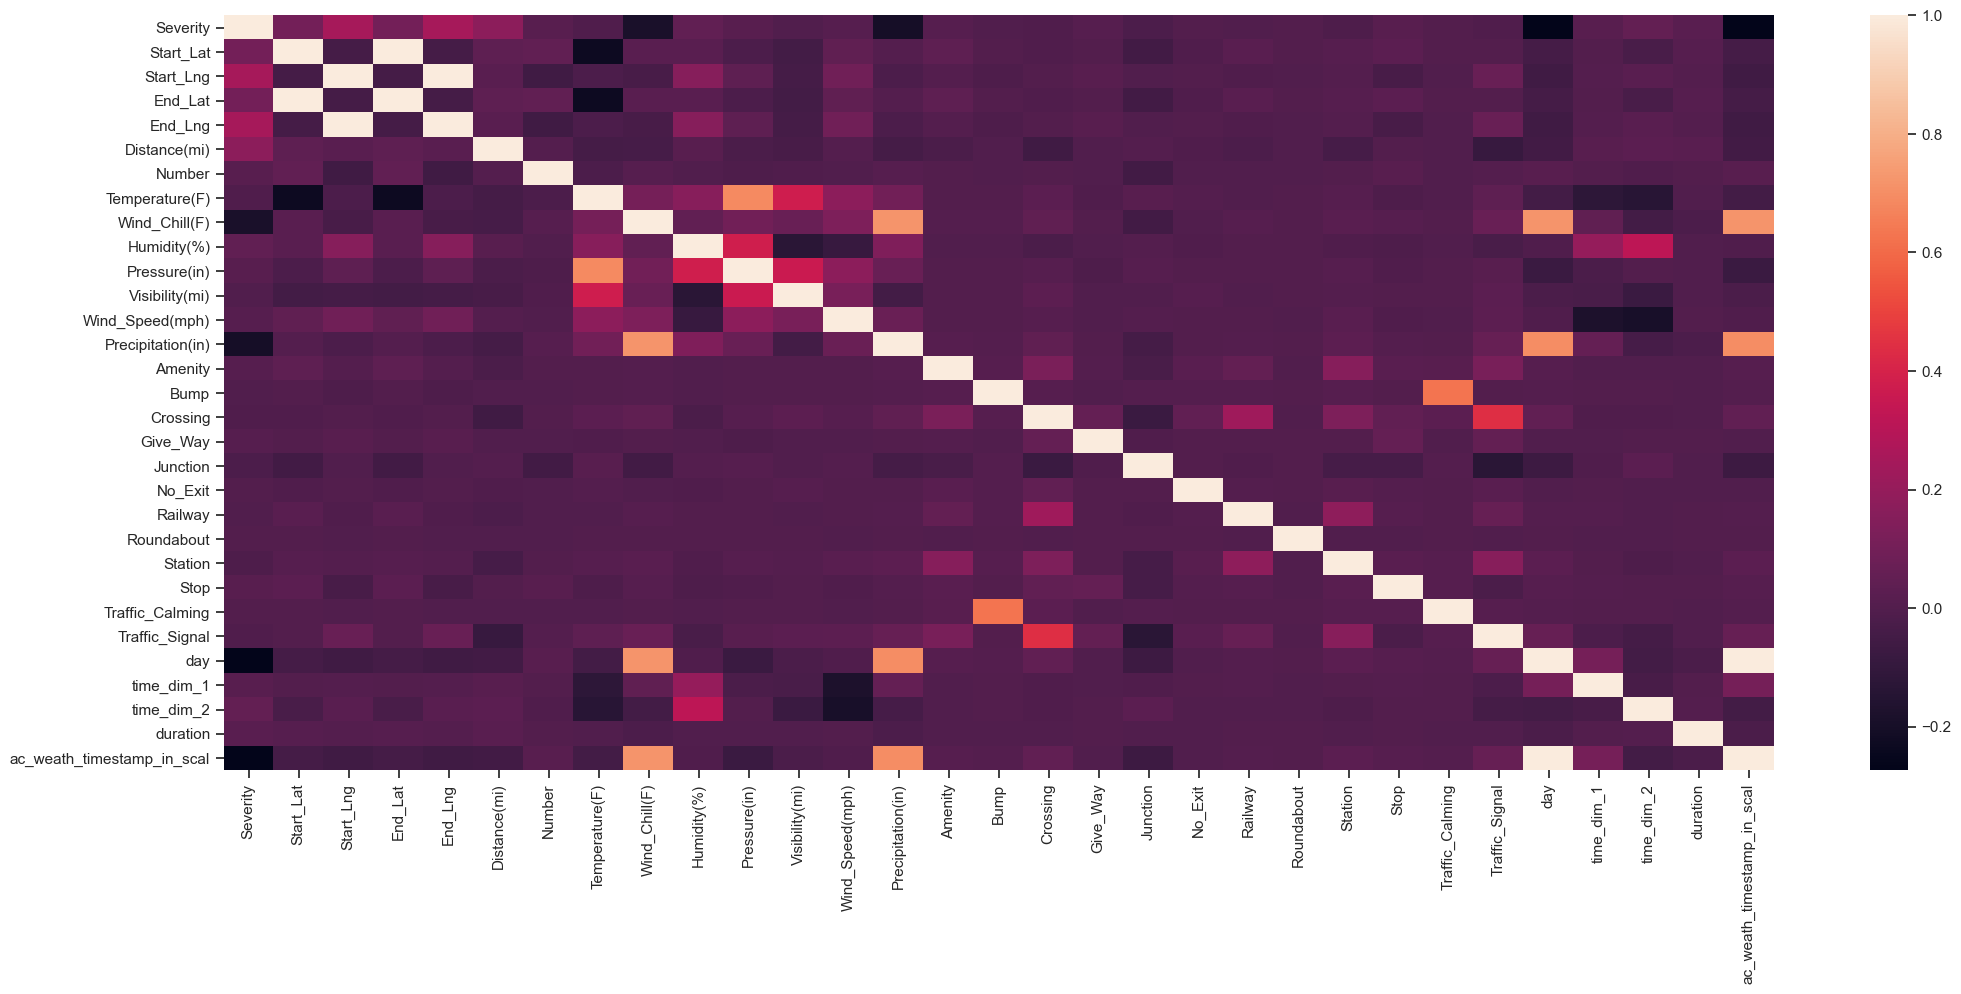

Severity                      1.000000
ac_weath_timestamp_in_scal    0.274007
day                           0.273994
End_Lng                       0.249413
Start_Lng                     0.249407
Precipitation(in)             0.201763
Wind_Chill(F)                 0.185841
Distance(mi)                  0.175103
End_Lat                       0.099982
Start_Lat                     0.099974
time_dim_2                    0.050813
Humidity(%)                   0.047686
duration                      0.022812
time_dim_1                    0.017209
Junction                      0.015792
Stop                          0.015487
Pressure(in)                  0.015482
Number                        0.014814
Give_Way                      0.014293
Station                       0.012798
Wind_Speed(mph)               0.011436
Amenity                       0.009794
Traffic_Signal                0.005829
Crossing                      0.005530
Temperature(F)                0.005298
Roundabout               

In [24]:
# before ending this section, here I do an ANOVA analysis to see possible relevence between categorical columns
# and severity of the accidents. Also, correlation between severity and all numerical solumns including the old 
# added columns except the new Description is performed here.
from scipy.stats import f_oneway



def cat_col_anova(df, cat_cols, continous_col):# this function conducts ANOVA for cat columns and any target column
    anova_dict={}
    for c in cat_cols:
       _, p = f_oneway(*[list(df[df[c] == category][continous_col]) for category in set(df[c])])
       anova_dict[c] = p
    return anova_dict

my_p_values = cat_col_anova(df, cat_col, 'Severity') # anova is performed.

cor = df[non_cat_col].corr() # correlation between numerical columns and Severity is calculated.

plt.figure(figsize = (25, 10), dpi=100)
sns.heatmap(cor)
plt.show()

cor["Severity"].abs().sort_values(ascending = False, inplace = False)
# as seen,,, have more correlation with the output compared to other features.

<code>  


    
    

</code>


### <font  >**Prediction the severity of the accidents:**</font>


In [25]:

# finally, I used the obtained dataset to train a model that predicts the severity of the accidents. Again I used
#  keras tensorflow-backend library  for buiding the model, and tensorflow 2 for nuilding the dataset.



df = shuffle(df, random_state = 0) # the samples are shuffled.

train, test = train_test_split(df, test_size = .05, random_state = 1)
# 5 percents of the samples are used for testing the model.
train, val = train_test_split(train, test_size = .2, random_state = 1)
# of the remaining,20 percent for validation.
y_train = train["Severity"] # label and features are seperated.
x_train = train.drop(['Severity'], axis = 1)
y_val = val["Severity"]
x_val = val.drop(['Severity'], axis = 1)
y_test = test["Severity"]
x_test = test.drop(['Severity'], axis = 1)

scaler = MinMaxScaler() 
x_train = scaler.fit_transform(x_train) # the training dataset is scaled and the
# validation set  and testset are scaled accordingly.
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

train_ds = tf.data.Dataset.from_tensor_slices((x_train, y_train))# using tensorflow dataset library, datsets
# are built.
val_ds = tf.data.Dataset.from_tensor_slices((x_val, y_val))
test_ds = tf.data.Dataset.from_tensor_slices((x_test, y_test))

print(train_ds.cardinality().numpy())
# datsets are put in mini batches. for this particular dataset this size were found more useful.
train_ds = train_ds.batch(batch_size=1024).cache(
).shuffle(buffer_size = len(train_ds), seed = 0).prefetch(buffer_size = tf.data.experimental.AUTOTUNE)
val_ds = val_ds.batch(batch_size = 64)

print(train_ds.cardinality().numpy())
train_ds.element_spec

238150
233


(TensorSpec(shape=(None, 47), dtype=tf.float64, name=None),
 TensorSpec(shape=(None,), dtype=tf.int64, name=None))

In [26]:
# the model is a neural network with 3 hidden layers(excluding the Dropout layer)
my_model = tf.keras.Sequential()
my_model.add(tf.keras.Input(shape = (47,)))
my_model.add(tf.keras.layers.Dense(256, activation = 'relu'))
my_model.add(tf.keras.layers.Dense(128, activation = "relu"))
my_model.add(tf.keras.layers.Dense(16, activation = "relu"))
my_model.add(tf.keras.layers.Dropout(.5))
my_model.add(tf.keras.layers.Dense(3))



loss_funstion = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = True)
my_optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001)
my_model.compile(optimizer = my_optimizer, loss = loss_funstion, metrics = ['accuracy'])
# accuracy is used as the metric.
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               12288     
_________________________________________________________________
dense_2 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_3 (Dense)              (None, 16)                2064      
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 51        
Total params: 47,299
Trainable params: 47,299
Non-trainable params: 0
_________________________________________________________________


In [27]:
train_history = my_model.fit(train_ds, epochs = 120, validation_data = val_ds)

Epoch 1/120
233/233 [==============================] - 7s 32ms/step - loss: 0.6731 - accuracy: 0.7087 - val_loss: 0.4974 - val_accuracy: 0.7941
Epoch 2/120
233/233 [==============================] - 7s 31ms/step - loss: 0.5548 - accuracy: 0.7648 - val_loss: 0.4780 - val_accuracy: 0.8013
Epoch 3/120
233/233 [==============================] - 7s 29ms/step - loss: 0.5308 - accuracy: 0.7748 - val_loss: 0.4558 - val_accuracy: 0.8100
Epoch 4/120
233/233 [==============================] - 7s 30ms/step - loss: 0.5162 - accuracy: 0.7803 - val_loss: 0.4392 - val_accuracy: 0.8174
Epoch 5/120
233/233 [==============================] - 7s 31ms/step - loss: 0.5034 - accuracy: 0.7851 - val_loss: 0.4339 - val_accuracy: 0.8185
Epoch 6/120
233/233 [==============================] - 8s 35ms/step - loss: 0.4934 - accuracy: 0.7886 - val_loss: 0.4301 - val_accuracy: 0.8207
Epoch 7/120
233/233 [==============================] - 7s 29ms/step - loss: 0.4858 - accuracy: 0.7905 - val_loss: 0.4222 - val_accuracy:

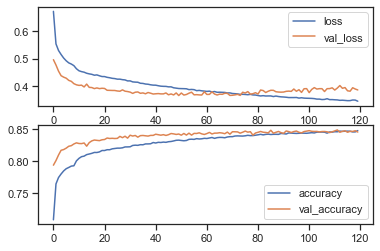

In [28]:
# here the losses and accuracies for training and validation are plotted.
train_dict = train_history.history
x_axis = range(120)
plt.subplot(211)
plt.plot(x_axis, train_dict["loss"])
plt.plot(x_axis, train_dict["val_loss"])
plt.legend(['loss', 'val_loss'])
plt.subplot(212)
plt.plot(x_axis, train_dict["accuracy"])
plt.plot(x_axis, train_dict["val_accuracy"])
plt.legend(['accuracy', 'val_accuracy'])

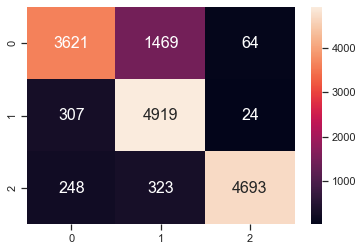

In [29]:
# here we use the test set to predict the accuracy of the model.
out = my_model.predict(x_test)
predicted_classes = np.argmax(out, axis = 1)
from sklearn.metrics import confusion_matrix
conf = confusion_matrix(y_test, predicted_classes)
sns.heatmap(conf, annot = True, annot_kws = {"size": 16}, fmt = '.0f')
plt.show()

Note that 0, 1,and 2, here, represent, respectively, accident severity type 2, 3 and 4 in the original dataset. As seen, the major source of errors is the type 2 accidents that are predicted as type 3.


<code>
    
    
</code>

In the original dataset, just selecting severity 2 provides 80 percent accuracy as this class forms 80 percent of the dataset. However, in the balanced dataset, each severity rate has 1/3 of the samples and the accuracy of the prediction in the datset is around  84 percent wich is reasonable. More relevent features such as the age of the driver, approximate speed at the accident moment, the type and maker of the cars, whether the driver was drunk or not etc., could assist better to achieve higher accuracies.